In [1]:
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
path = 'D:\\Code_projects\\Work_timer\\log_files\\'
log_files = glob.glob( path+ '*.csv')  

df = pd.DataFrame()
for file in log_files :
    df_temp = pd.read_csv( file, index_col=None, header=0)  
#     df_temp['day 0']  = df_temp['date'].min()
    df = df.append(df_temp ,sort=False)   
df.tail()


,date,start time,Task,Label,Duration (s)
41,2020/04/10,17:49:02,Timer coding,Study,1007
42,2020/04/10,18:05:54,Timer coding,Study,545
43,2020/04/11,11:36:45,Cuomo conference,News,458
44,2020/04/11,11:44:40,Read online,News,1142
45,2020/04/11,12:22:11,NOS,News,793


In [3]:
df['date'] = pd.to_datetime(df['date'] )  
df['Duration (hh:mm:ss)'] = pd.to_timedelta(df['Duration (s)'],'s')
df.tail()
df['Week'] = df['date'].dt.strftime("%V")

In [4]:
df_week = df.groupby(['Week','Label',]).sum()
df_week['Time spent per week'] = pd.to_timedelta(df_week['Duration (s)'],'s')
df_week =df_week.drop( ['Duration (s)'],axis=1) 
df_week

Time spent per week
Week Label                          
13   Other                  00:20:00
14   Other                  00:15:00
15   FEA project            01:24:21
     Jobsearch              00:42:46
     Meetings               03:01:44
     News                   00:39:53
     Other                  04:26:55
     Study                  04:37:45

In [5]:
df_day = df.groupby(['date','Label',]).sum()
df_day['Time spent per day'] = pd.to_timedelta(df_day['Duration (s)'],'s')
df_day =df_day.drop( ['Duration (s)'],axis=1) 
df_day

Time spent per day
date       Label                         
2020-03-25 Other                 00:15:00
2020-03-27 Other                 00:05:00
2020-04-01 Other                 00:15:00
2020-04-08 Jobsearch             00:00:05
           Meetings              00:52:10
           Other                 00:59:06
2020-04-09 Jobsearch             00:42:41
           Other                 01:15:00
           Study                 02:07:57
2020-04-10 FEA project           01:24:21
           Meetings              02:09:34
           Other                 02:12:49
           Study                 02:29:48
2020-04-11 News                  00:39:53

In [6]:
df_day.groupby('date').sum()

,Time spent per day
date,
2020-03-25,00:15:00
2020-03-27,00:05:00
2020-04-01,00:15:00
2020-04-08,01:51:21
2020-04-09,04:05:38
2020-04-10,08:16:32
2020-04-11,00:39:53


In [7]:
for day in df['date'].unique()[-2:]:
    print(day)
    bool_day = df['date'] == day
    
    df_temp = df[bool_day]
df_temp.tail()

2020-04-10T00:00:00.000000000
2020-04-11T00:00:00.000000000


,date,start time,Task,Label,Duration (s),Duration (hh:mm:ss),Week
43,2020-04-11,11:36:45,Cuomo conference,News,458,00:07:38,15
44,2020-04-11,11:44:40,Read online,News,1142,00:19:02,15
45,2020-04-11,12:22:11,NOS,News,793,00:13:13,15


In [8]:
# plot parameters
 
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt


cols = np.array([[166,206,227], 
[31,120,180], 
[178,223,138], 
[51,160,44], 
[251,154,153], 
[227,26,28], 
[253,191,111], 
[255,127,0], 
[202,178,214], 
[106,61,154], 
[255,255,153]]) /255 
 
cmap = ListedColormap(cols) 

 
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

 



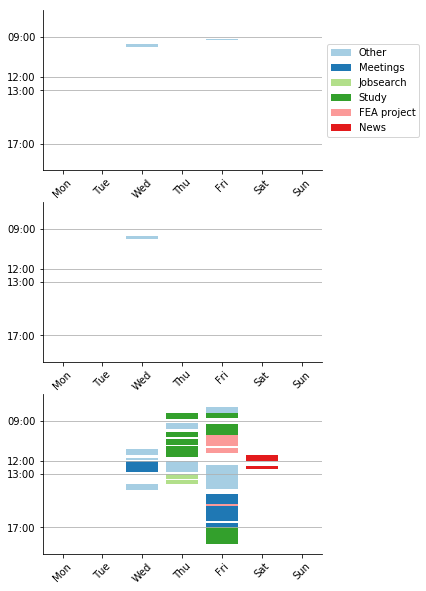

In [9]:


from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

def tick(x,pos): 
        return days[int(x)]  
    
    

def hours_to_hhmm( arr ): 
    out_list = []
    for val in arr:
        if val< 10:
            test = '0' + str(val) +':00'
        else:
            test = str(val) + ':00'
        out_list.append(test)
    return( out_list ) 


days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
monthsFmt = DateFormatter("%a")
weeks = df['Week'].unique()

fig, ax = plt.subplots(len(weeks), 1, figsize =(5,10))

for i,week in enumerate(weeks): 
    bool_week = df['Week'] == week
    days_in_week = df.loc[bool_week,'date'].unique()
    for day in days_in_week : 
        bool_day = df['date'] == day 
        df_temp = df[bool_day] 

        for j,row in df_temp.iterrows():
            y = get_sec( row['start time'] )
            dy =  row['Duration (s)'] 
            label = row['Label'] 
            col_ind = np.where( df['Label'].unique() == label )[0][0] 

            ax[i].bar( row['date'],dy, bottom = y, color = cols[col_ind] , label = label ) 

 

    first_day = pd.to_datetime( days_in_week[0] )
    mon_day = first_day - datetime.timedelta( first_day.isocalendar()[2] -0.5 )
    sun_day = mon_day + datetime.timedelta( 7)
    ax[i].set_xlim([mon_day,sun_day])

    hours = np.array([9,12,13,17])
    
    ax[i].yaxis.set_ticks( hours*3600)
    ax[i].yaxis.set_ticklabels( hours_to_hhmm(hours ) )
    ax[i].yaxis.grid('on')

    ax[i].set_ylim([7*3600,19*3600]) 
    ax[i].xaxis.set_major_locator(MultipleLocator(1))
    ax[i].xaxis.set_major_formatter(monthsFmt) 
    for tick in ax[i].get_xticklabels():
        tick.set_rotation( 45 )
        
    ax[i].set_xlim()
    ax[i].invert_yaxis()
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
#     ax[i].spines['left'].set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5) )